In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp /content/gdrive/MyDrive/xrays-and-gradcam-master/plot_utils.py /content
!cp /content/gdrive/MyDrive/xrays-and-gradcam-master/utils.py /content
!cp /content/gdrive/MyDrive/xrays-and-gradcam-master/networks.py /content
!cp /content/gdrive/MyDrive/xrays-and-gradcam-master/grad_cam.py /content

In [4]:
import utils
import networks
from grad_cam import GradCAM
from plot_utils import plot_confmat, plot_gradcam

import torch
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
train_set = datasets.ImageFolder(root=utils.dirs['train'], transform=utils.transform['eval'])
test_set = datasets.ImageFolder(root=utils.dirs['test'], transform=utils.transform['eval'])
train_dl = DataLoader(train_set, batch_size=128)
test_dl = DataLoader(test_set, batch_size=120)

### VGG-16

In [7]:
vgg16 = networks.get_vgg16(out_features=4, path='/content/gdrive/MyDrive/xrays-and-gradcam-master/models/lr3e-5_vgg_cuda.pth')
train_preds = utils.get_all_preds(vgg16, train_dl)
test_preds = utils.get_all_preds(vgg16, test_dl)

train_preds.shape, test_preds.shape

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


(torch.Size([20717, 4]), torch.Size([250, 4]))

In [8]:
train_correct = utils.get_num_correct(train_preds, torch.as_tensor(train_set.targets, device=device))
test_correct = utils.get_num_correct(test_preds, torch.as_tensor(test_set.targets, device=device))

print(f'Train Correct: {train_correct:5}\tTrain Accuracy: {(100*train_correct/len(train_set)):5.2f}%')
print(f'Test Correct: {test_correct:6}\tTest Accuracy: {(100*test_correct/len(test_set)):6.2f}%')

Train Correct: 20611	Train Accuracy: 99.49%
Test Correct:    238	Test Accuracy:  95.20%


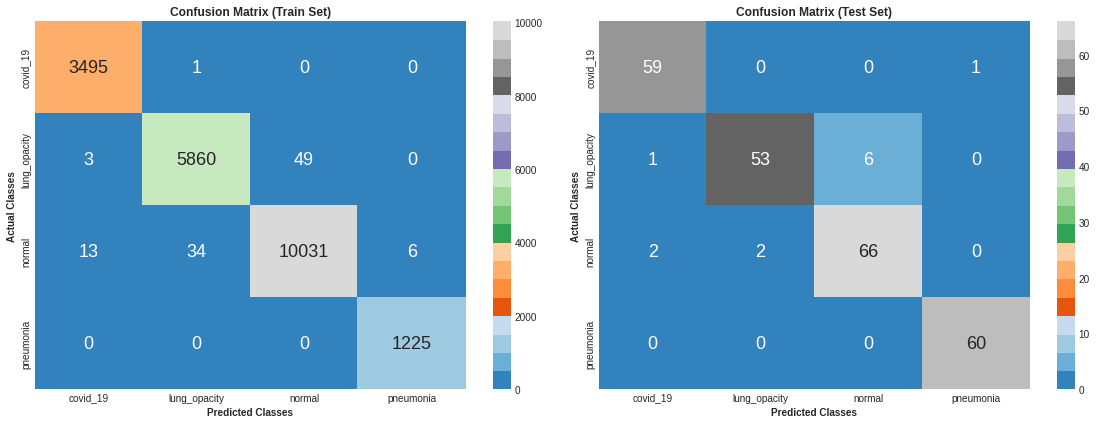

In [9]:
train_confmat = utils.get_confmat(train_set.targets, train_preds)
test_confmat = utils.get_confmat(test_set.targets, test_preds)
plot_confmat(train_confmat, test_confmat, train_set.classes, f'{type(vgg16).__name__.lower()}')

In [10]:
results = utils.get_results(test_confmat, test_set.classes)
results

{'covid_19': [0.9834710743801653,
  0.9516129032258065,
  0.9833333333333333,
  0.9672131147540983],
 'lung_opacity': [0.9635627530364372,
  0.9636363636363636,
  0.8833333333333333,
  0.9217391304347826],
 'normal': [0.9596774193548387,
  0.9166666666666666,
  0.9428571428571428,
  0.9295774647887323],
 'pneumonia': [0.99581589958159, 0.9836065573770492, 1.0, 0.9917355371900827]}

### ResNet-18

In [11]:
resnet18 = networks.get_resnet18(out_features=4, path='/content/gdrive/MyDrive/xrays-and-gradcam-master/models/lr3e-5_resnet_cuda.pth')
train_preds = utils.get_all_preds(resnet18, train_dl)
test_preds = utils.get_all_preds(resnet18, test_dl)

train_preds.shape, test_preds.shape

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


(torch.Size([20717, 4]), torch.Size([250, 4]))

In [12]:
train_correct = utils.get_num_correct(train_preds, torch.as_tensor(train_set.targets, device=device))
test_correct = utils.get_num_correct(test_preds, torch.as_tensor(test_set.targets, device=device))

print(f'Train Correct: {train_correct:5}\tTrain Accuracy: {(100*train_correct/len(train_set)):5.2f}%')
print(f'Test Correct: {test_correct:6}\tTest Accuracy: {(100*test_correct/len(test_set)):6.2f}%')

Train Correct: 20687	Train Accuracy: 99.86%
Test Correct:    237	Test Accuracy:  94.80%


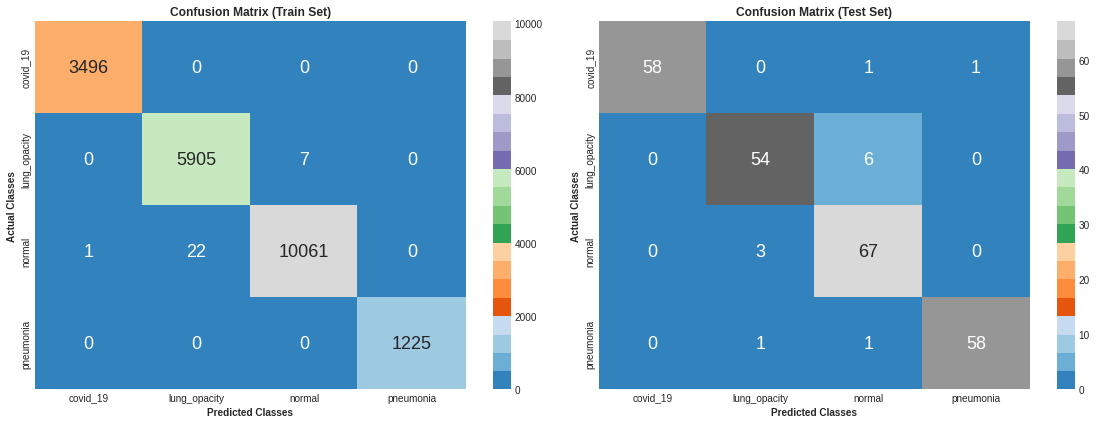

In [13]:
train_confmat = utils.get_confmat(train_set.targets, train_preds)
test_confmat = utils.get_confmat(test_set.targets, test_preds)
plot_confmat(train_confmat, test_confmat, train_set.classes, f'{type(resnet18).__name__.lower()}')

In [14]:
results = utils.get_results(test_confmat, test_set.classes)
results

{'covid_19': [0.9916317991631799, 1.0, 0.9666666666666667, 0.983050847457627],
 'lung_opacity': [0.9595141700404858,
  0.9310344827586207,
  0.9,
  0.9152542372881356],
 'normal': [0.9556451612903226,
  0.8933333333333333,
  0.9571428571428572,
  0.9241379310344828],
 'pneumonia': [0.9875,
  0.9830508474576272,
  0.9666666666666667,
  0.9747899159663865]}

### DenseNet-121

In [15]:
densenet121 = networks.get_densenet121(out_features=4, path='/content/gdrive/MyDrive/xrays-and-gradcam-master/models/lr3e-5_densenet_cuda.pth')
train_preds = utils.get_all_preds(densenet121, train_dl)
test_preds = utils.get_all_preds(densenet121, test_dl)

train_preds.shape, test_preds.shape

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


(torch.Size([20717, 4]), torch.Size([250, 4]))

In [16]:
train_correct = utils.get_num_correct(train_preds, torch.as_tensor(train_set.targets, device=device))
test_correct = utils.get_num_correct(test_preds, torch.as_tensor(test_set.targets, device=device))

print(f'Train Correct: {train_correct:5}\tTrain Accuracy: {(100*train_correct/len(train_set)):5.2f}%')
print(f'Test Correct: {test_correct:6}\tTest Accuracy: {(100*test_correct/len(test_set)):6.2f}%')

Train Correct: 19967	Train Accuracy: 96.38%
Test Correct:    236	Test Accuracy:  94.40%


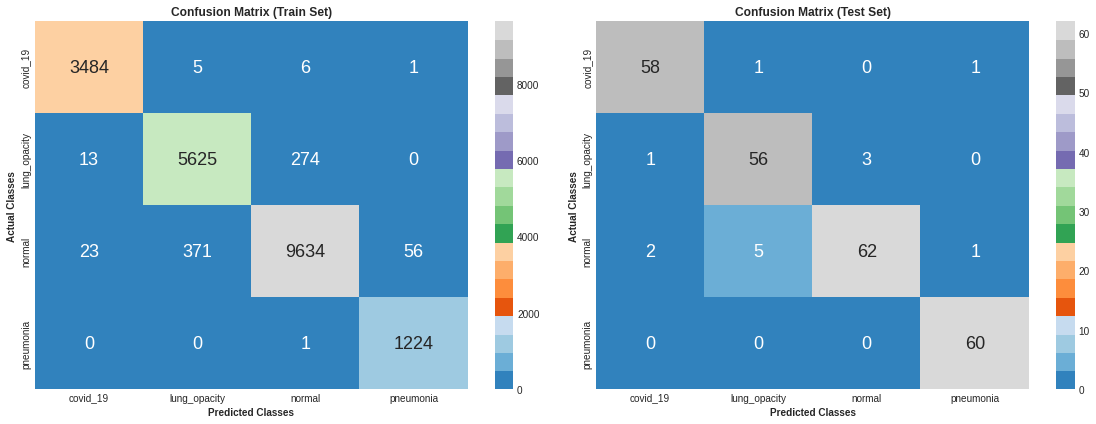

In [17]:
train_confmat = utils.get_confmat(train_set.targets, train_preds)
test_confmat = utils.get_confmat(test_set.targets, test_preds)
plot_confmat(train_confmat, test_confmat, train_set.classes, f'{type(densenet121).__name__.lower()}')

In [18]:
results = utils.get_results(test_confmat, test_set.classes)
results

{'covid_19': [0.979253112033195,
  0.9508196721311475,
  0.9666666666666667,
  0.9586776859504132],
 'lung_opacity': [0.959349593495935,
  0.9032258064516129,
  0.9333333333333333,
  0.9180327868852459],
 'normal': [0.9554655870445344,
  0.9538461538461539,
  0.8857142857142857,
  0.9185185185185185],
 'pneumonia': [0.9915966386554622, 0.967741935483871, 1.0, 0.9836065573770492]}

### GradCAM

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


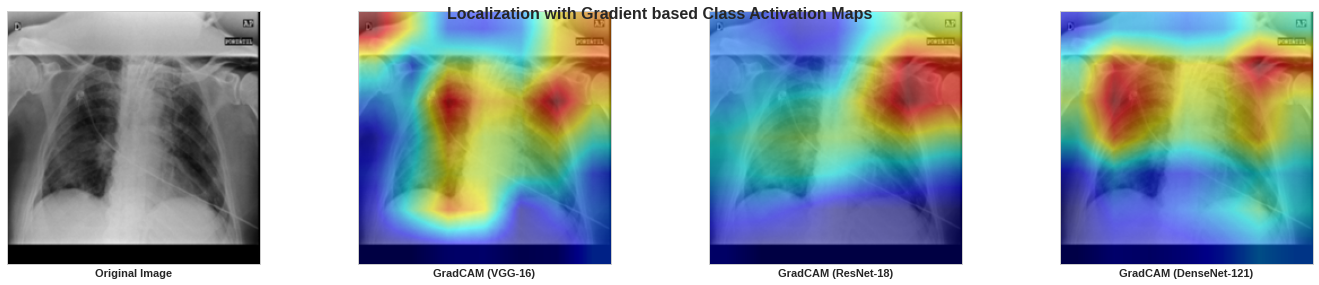

In [19]:
image, label = test_set[32]
image = image.unsqueeze(dim=0).to(device)

cam_obj = GradCAM(model=vgg16, target_layer=vgg16.features[-1])
_, vgg_cam = cam_obj(image, label)

cam_obj = GradCAM(model=resnet18, target_layer=resnet18.layer4[-1])
_, res_cam = cam_obj(image, label)

cam_obj = GradCAM(model=densenet121, target_layer=densenet121.features[-1])
_, dense_cam = cam_obj(image, label)

plot_gradcam(image, vgg_cam, res_cam, dense_cam)